**Rozwiązywanie równań nieliniowych**

In [20]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.misc import derivative as deriv

**Zadanie 1.**

In [21]:
# Data
f_1 = lambda x: x**3-5*x
df_1 = lambda x: 3*x**2 - 5
x0_1 = 1.0
f_2 = lambda x: x**3-3*x+1
df_2 = lambda x: 3*x**2 - 3
f_3 = lambda x: 2-x**5
df_3 = lambda x: -5*x**4
x0_3 = 0.01
f_4 = lambda x: x**4-4.29*x**2-5
df_4 = lambda x: 4*x**3 - 4.29*x
x0_4 = 0.8

# Newton-Raphson's method
def newton(f, df, x0, n=50):
    x = x0
    for _ in range(n):
        d = df(x)
        if d == 0: return None
        x = x - f(x)/df(x)
    return x

# Initial found roots
root_f_1 = newton(f_1, df_1, x0_1)
root_f_2 = newton(f_2, df_2, x0_1)
root_f_3 = newton(f_3, df_3, x0_3)
root_f_4 = newton(f_4, df_4, x0_4)
print(root_f_1, root_f_2 ,root_f_3, root_f_4)

1.0 None 713.6238464957056 -2.2898803639523853


**Zadanie 2.**

[1.33333333 0.75       0.5        0.        ]


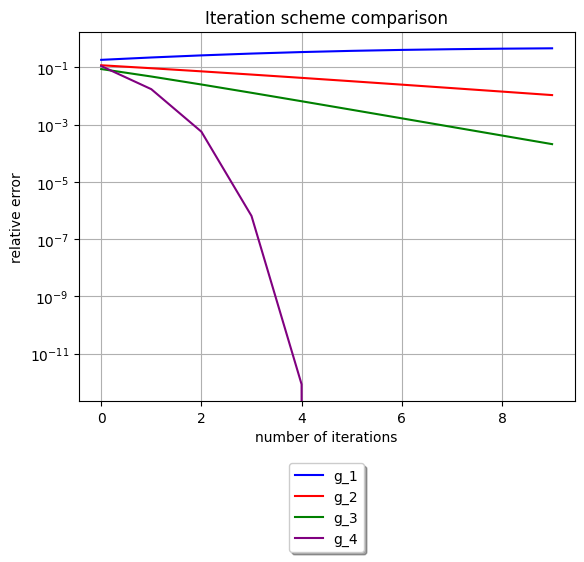

In [22]:
# Data
f = lambda x: x**2-3*x+2
g_1 = lambda x: (x**2+2)/3
g_2 = lambda x: np.sqrt(3*x-2)
g_3 = lambda x: 3 - 2/x
g_4 = lambda x: (x**2 - 2)/(2*x-3)

x0 = 2.0
init = 1.7
n = 10
n_range = np.array(range(0,n))

dg_1 = lambda x: 2*x/3
dg_2 = lambda x: 3/(2*np.sqrt(3*x-2))
dg_3 = lambda x: 2/x**2
dg_4 = lambda x: 2*(x**2 -3*x +2)/(2*x-3)**2


g_conv_rate = np.abs([dg_1(x0), dg_2(x0), dg_3(x0), dg_4(x0)])
print(g_conv_rate)

def iterate(f, init, x0, n):
    x = init
    errors = []
    for _ in range(n):
        x = f(x)
        error = np.abs(x - x0)
        errors.append(error)
    return np.array(errors)

errors_g_1 = iterate(g_1, init, x0, n)
errors_g_2 = iterate(g_2, init, x0, n)
errors_g_3 = iterate(g_3, init, x0, n)
errors_g_4 = iterate(g_4, init, x0, n)

# Plot
plt.title("Iteration scheme comparison")
plt.plot(n_range, errors_g_1/x0, color='blue', label='g_1')
plt.plot(n_range, errors_g_2/x0, color='red', label='g_2')
plt.plot(n_range, errors_g_3/x0, color='green', label='g_3')
plt.plot(n_range, errors_g_4/x0, color='purple', label='g_4')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

0.7136419699591807 1.0063420698282552 1.0006033988103809 1.9996682640830932


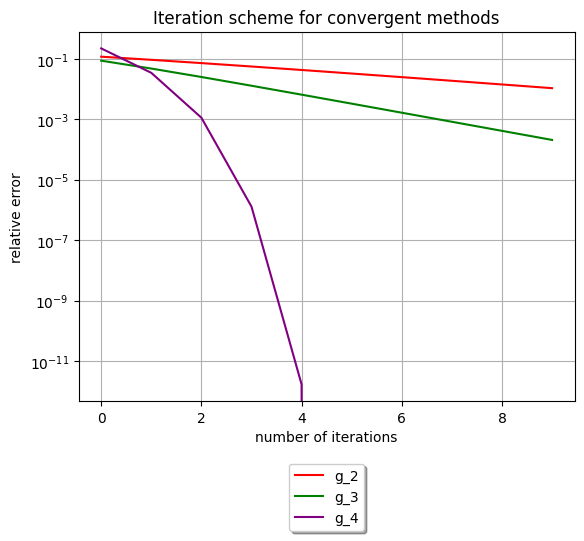

In [23]:
# Rate of convergence calculation
R = lambda eps, k: np.log(eps[k]/eps[k+1])/np.log(eps[k-1]/eps[k])

r_1 = R(errors_g_1,8)
r_2 = R(errors_g_2,8)
r_3 = R(errors_g_3,8)
r_4 = R(errors_g_4,3)

print(r_1, r_2, r_3, r_4)

# Plot
plt.title("Iteration scheme for convergent methods")
plt.plot(n_range, errors_g_2/x0, color='red', label='g_2')
plt.plot(n_range, errors_g_3/x0, color='green', label='g_3')
plt.plot(n_range, errors_g_4, color='purple', label='g_4')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

**Zadanie 3.**

In [24]:
# Data
h_1 = lambda x: x**3-2*x-5
h_2 = lambda x: np.exp(-x) - x
h_3 = lambda x: x*np.sin(x) - 1

dh_1 = lambda x: 3*x**2 - 2
dh_2 = lambda x: -np.exp(-x) - 1
dh_3 = lambda x: np.sin(x) + x*np.cos(x)

x0_1 = 2
x0_2 = 0
x0_3 = 9

true_value_1 = 2.09455148154232659148238654
true_value_2 = 0.56714329040978387299996866
true_value_3 = 9.31724294141480961860128851

n = 6
n_range = np.array(range(0,n))

# Newton-Raphson's method
def newton_(f, df, x0, true_value, n):
    x = x0
    errors = []
    for _ in range(n):
        x = x - f(x)/df(x)
        error = np.abs(x - true_value)
        errors.append(error)
    return np.array(errors)

errors_h_1 = newton_(h_1, dh_1, x0_1, true_value_1, n)
errors_h_2 = newton_(h_2, dh_2, x0_2, true_value_2, n)
errors_h_3 = newton_(h_3, dh_3, x0_3, true_value_3, n)

**Zadanie 4.**

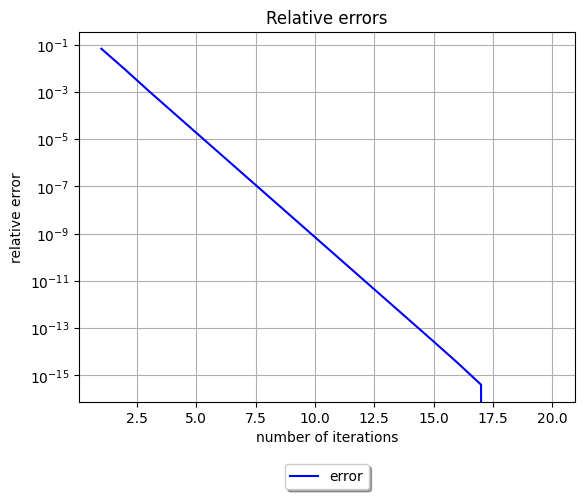

In [25]:
# Data
f_1 = lambda x, y: x**2 + y**2 - 1
f_2 = lambda x, y: x**2 - y

x0 = [1.0, 1.0]

true_value = (np.sqrt(np.sqrt(5)/2 - 0.5), np.sqrt(5)/2 - 0.5)
true_value_norm = np.sqrt(true_value[0]**2 + true_value[1]**2)

n = 20
n_range = np.array(range(0,n))

df_1_x = lambda x, _: 2*x
df_1_y = lambda y, _: 2*y
df_2_x = lambda x, _: 2*x
df_2_y = lambda _, __: -1

# Newton-Raphson's method for 2 variable functions
def newton_eq(f, g, df, dg, x0, true_value, n):
    x = np.array(x0)
    errors = []
    for _ in range(n):
        D = np.array([[df[0](x[0], x[1]), df[1](x[0], x[1])], 
        [dg[0](x[0], x[1]), dg[1](x[0], x[1])]])
        F = np.array([f(x[0], x[1]), g(x[0], x[1])])
        # X = D^{-1} @ F
        # D @ X = F
        X = scipy.linalg.solve(D, F) 
        x = x - X
        error = np.sqrt((x[0] - true_value[0])**2 + (x[1] - true_value[1])**2)
        errors.append(error)
    return np.array(errors)


errors = newton_eq(f_1, f_2, [df_1_x, df_1_y], [df_2_x, df_2_y],
                    x0, true_value, n)


# Plot
plt.title("Relative errors")
plt.plot(n_range+1, errors/true_value_norm, color='blue', label='error')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()
